# Scientific Python Tutorial

This is a tutorial for [Scientific Python (Scipy)](http://scipy.org/), a scientific computing module for the [Python programming language](http://python.org/). The goal of this tutorial to provide a "walkthrough", guiding you through the steps of writing some basic but complete Scipy programs. It assumes no pre-existing knowledge of the Python programming language; programming language constructs are explained as they appear.

For a more complete exploration of Scipy, there are a couple of other excellent introductions available online:

* [Scipy Tutorial](http://docs.scipy.org/doc/scipy/reference/tutorial/general.html): the official tutorial.
* [Scipy Lecture Notes](http://scipy-lectures.github.io/): a textbook which goes in-depth into using Scipy.

## Preliminaries

### Jupyter web notes

This tutorial runs on a [Jupyter](http://jupyter.org/) web notebook. Further down, you will see "cells" containing Python code that you can edit. Each cell can be executed by selecting it with a mouse click, then using the keyboard shortcut <code>Ctrl-Enter</code>, or the menu option <code>Cell &rarr; Run Cells</code>, or the <code>Run Cell</code> button on the tool-bar. The Python code in the cell will run on the server, and the results will be displayed in your web browser. This allows you to go through the tutorial entirely within the web browser.

### Installing Python and Scipy on your own computer

Instead of running the code examples in the Jupyter notebook, you may wish to run the Python code examples on your own computer. (You'll need to do that anyway, to complete the course assignments.) For this, [Python](http://python.org/) and [Scipy](http://scipy.org/) need to be installed.

* If you are using GNU/Linux, Python is probably already installed, so just install Scipy using the package manager (e.g. <code>apt-get install scipy</code> for Debian or Ubuntu). Be sure to choose the Python 3.x option, not the Python 2.x version.
* Alternatively, you can install the [Anaconda distribution](https://www.continuum.io/downloads), which bundles Python, Scipy, and some other useful libraries. Anaconda is available for all major operating systems.  Again, be sure to choose the Python 3.x option, not the Python 2.x version.
* If you don't want to use Anaconda, here are local mirrors of Windows installers for Python and Scipy: (i) install  [python-3.4.2.amd64.msi](http://web.spms.ntu.edu.sg/~ydchong/python-3.4.2.amd64.msi) ([original source](http://python.org/download/)); (ii) next, install [Scipy-stack-14.8.27.win-amd64-py3.4.exe](http://web.spms.ntu.edu.sg/~ydchong/Scipy-stack-14.8.27.win-amd64-py3.4.exe) ([original source](http://www.lfd.uci.edu/~gohlke/pythonlibs/#scipy-stack)).

***This tutorial will assume you are using Python 3.*** It is possible to use Scipy with Python 2, but you'll encounter lots of little differences, too many and annoying to enumerate. It is recommended for all new Python code to use Python 3.

Next, you should make sure that Python and Scipy are installed correctly. If you are using GNU/Linux, open up a text terminal and type <code>python</code>. If you are using Windows, launch the program <code>Python 3.x &rarr; IDLE (Python GUI)</code>.  In both case, this will open up a text terminal with contents looking like this:

    Python 3.5.2 (default, Jun 28 2016, 08:46:01) 
    [GCC 6.1.1 20160602] on linux
    Type "help", "copyright", "credits" or "license" for more information.
    >>>

The <code>>>></code> part is a command prompt. Type the following at this prompt:

    >>> from scipy import *

After pressing Enter, there should be a brief pause, after which you get back to the prompt. This means that Scipy was loaded without any error.  If you saw a message like <code>ImportError: No module named 'scipy'</code>, that means Scipy was somehow not installed correctly.

Next, type this:

    >>> import matplotlib.pyplot as plt

Again, there should be no error message.  These two commands initialize the Scipy scientific computing module, and the Matplotlib plotting module, so that they are now available for use in Python.

Note: in the future, there is no need to type these lines in by hand each time you start Python. These and other initialization lines will be placed in the program source code.

## A very simple Scipy program  

Let's get started with a simple plot of $y = \sin(x)$.  Below, you should see a cell containing some Python code.  Select the cell with a mouse click, then run it by using the keyboard shortcut <code>Ctrl-Enter</code>, or the menu option <code>Cell &rarr; Run Cells</code>, or the <code>Run Cell</code> button on the tool-bar. This should display a graph of the sine function.

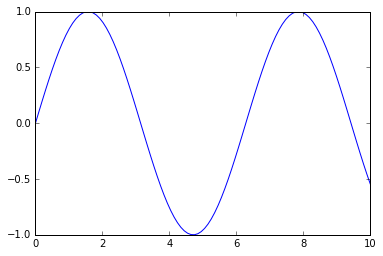

In [4]:
%matplotlib inline
from scipy import *
import matplotlib.pyplot as plt

x = linspace(0, 10, 100)
y = sin(x)
plt.plot(x,y)
plt.show()

If you are running the Python code on your own computer (rather than using the Jupyter web notebook), type the lines of code into the Python command prompt, one at a time. However, ***omit the first line*** (<code>%matplotlib inline</code>).  That line controls how the plot is displayed in the web browser, and it's meaningless outside of a Jupyter notebook.

After the <code>%matplotlib inline</code> indicator, the next two lines of code import the <code>scipy</code> and <code>matplotlib.pyplot</code> modules, so that they can be used in the program. We will explain how these "import" lines work later. For now, just note that these two lines will be present at the top of every program that we write.

The following four lines of code are the ones that do the actual work. Here is what they do:

* Create an array (a sequence of numbers), consisting of 100 numbers between 0 and 10, inclusive, by calling the function <code>[linspace](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)</code>.  Give this array the name <code>x</code>.
* Create an array whose elements are the sines of the elements in <code>x</code>, by calling the function <code>[sin](http://docs.scipy.org/doc/numpy/reference/generated/numpy.sin.html)</code>. This array consists of 100 numbers (the same length as <code>x</code>), where the first is $\sin(0)$ and the last is $\sin(10)$.  Give this array the name <code>y</code>.
* Generate a plot, using <code>x</code> as the set of horizontal coordinates, and <code>y</code> as the set of vertical coordinates.  This is done by calling the <code>[plot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)</code> function.
* Display the plot on-screen, by calling the <code>[show](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.show)</code> function.

If you don't understand why certain lines are written the way they are, don't worry.  Let's just keep going for now; we'll explain more as we go along.

## Computing electrostatic potentials<a name="electrostatics"></a>

Next, let's walk through the steps of writing a program to perform a less trivial task: computing and plotting the electrostatic potential of a set of point charges.

Suppose we have a set of $N$ point charges distributed in 1D.  Let the positions of the particles be $\{x_0, x_1, \cdots, x_{N-1}\}$, and their electric charges be $\{q_0, q_1, \cdots, q_{N-1}\}$.  (Note that we have chosen to start counting from zero, so that $x_0$ is the first position and $x_{N-1}$ is the last position.) Knowing the positions and charges, we can calculate the potential $\phi(x)$ at any arbitrary point $x$; it is given by the formula

$$\phi(x) = \sum_{j=0}^{N-1} \frac{q_j}{4 \pi \epsilon_0 |x-x_j|}.$$

The factor of $4 \pi \epsilon_0$ in the denominator is annoying to keep around, so we will adopt "computational units" by rescaling the potential, positions and/or the charges so that $4 \pi \epsilon_0 = 1$.  Then the formula for the potential simplifies to

$$\phi(x) = \sum_{j=0}^{N-1} \frac{q_j}{|x-x_j|}.$$

Our goal is to write a program that takes a set of positions and charges as its input, and plots the potential $\phi(x)$ versus $x$.

### A first pass

Let's do a crude "first pass" at the program.  Instead of handling an arbitrary number of particles, suppose there's a *single* particle with some position, say $x_0 = 1.5$, and some charge $q_0 = 1.0$. In this case, we can plot the potential using the code below.

To run the program, sselect the cell with a mouse click, then use the keyboard shortcut <code>Ctrl-Enter</code>, or the menu option <code>Cell &rarr; Run Cells</code>, or the <code>Run Cell</code> button on the tool-bar.
<a name="example0"></a>

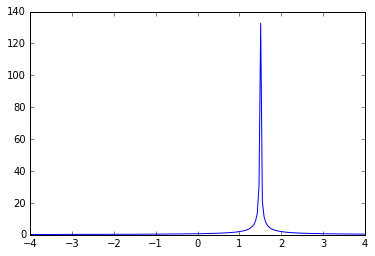

In [3]:
%matplotlib inline
from scipy import *
import matplotlib.pyplot as plt

x0 = 1.5
q0 = 1.0

x   = linspace(-4.0, 4.0, 200)
phi = q0 / abs(x - x0)

plt.plot(x, phi)
plt.show()

The program creates two variables <code>x0</code> and <code>q0</code>, assigning them fixed values.  Next, it creates an array named <code>x</code>, using the <code>[linspace](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)</code> function; this array consists of 500 numbers between -5 and 5, inclusive.  It then creates an array named <code>phi</code>, whose values are calculated using <code>q0</code>, <code>x0</code>, and <code>x</code> based on the formula for the electrostatic potential (the <code>[abs](https://docs.python.org/3/library/functions.html#abs)</code> function is used to compute the absolute value).

The final two lines create a plot of <code>phi</code> versus <code>x</code>, and display the plot.  The result shows that the potential is peaked at $x = 1.5$, the position of the particle. Since the charge of the particle is assigned a positive value (1.0), the potential is positive.

<table width=75%>
<tr><td>**Exercise**</td></tr>
<tr><td>
In the [above code cell](#example0), change the values of <code>x0</code>, <code>q0</code>, and/or the inputs to <code>[linspace](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)</code>.  Then re-run the program, and observe how the plot of $\phi(x)$ versus $x$ changes.</td></tr></table>

### Writing a Python file and running it on your own computer (optional)

If you have Scipy installed, you should try running the above program on your own computer. To do this, you must put the code into a file.
* Open [your preferred text editor](http://www.gnu.org/software/emacs/) and open an empty file, naming it <code>potentials.py</code>.
* Or, if you are using Windows, you can use the text editor bundled with Python; in the window opened by the <code>IDLE (Python GUI)</code> program, click on the menu-bar item <code>File &rarr; New File</code>; then type <code>Ctrl-s</code> (or click on <code>File &rarr; New File</code>) and save the empty file as <code>potentials.py</code>.

The file extension <code>.py</code> denotes it as a Python source code file.  You can place the file in any directory you like.

Next, copy the above Python code (omitting the <code>%matplotlib inline</code> line at the top) into <code>potentials.py</code>, and save it.  After saving, you can run the program.
* On GNU/Linux, open a text terminal and <code>cd</code> to the directory where the file is. Then type <code>python -i potentials.py</code>.
* On Windows, while in file-editing window type <code>F5</code> (or click on <code>Run</code> &rarr; <code>Run Module</code>).

In either case, the plot of $\phi(x)$ versus $x$ should be displayed.

After closing the figure, you will return to the Python command prompt. Note that Python is still running, even though your program has finished (if you ran Python from the text terminal, this is due to the <code>-i</code> option that you used to invoke Python). From the Python command prompt, you can examine the values of the variables which were created by your program, by typing their names into the command prompt.  For example,

    >>> x0
    1.5
    >>> phi
    array([ 0.15384615    0.15432194    0.15480068    0.1552824  ....
              ....        0.28902404    0.28735963    0.28571429 ])

The value of <code>x0</code> is a number, 1.5, which was assigned to it when our program ran.  The value of <code>phi</code> is more complicated: it is an **array**, which is a special data structure containing a sequence of numbers. From the command line, you can inspect the individual elements of this array.  For example, to see the value of the array's first element, type this:

    >>> phi[0]
    0.153846153846

As we've mentioned, index 0 refers to the *first* element of the array.  Similarly, index 1 refers to the second element of the array, index 2 refers to the third element, etc. You can also look at the length of the array, by calling the function <code>len</code>. This function accepts an array input and returns its length, as an integer.

    >>> len(phi)
    500

You can exit the Python command prompt at any time by typing <code>Ctrl-d</code> or <code>exit()</code>.

### Module imports<a name="import"></a>

At the beginning of [the above program](#example0), you may have again noticed the presence of these two lines of code:

    from scipy import *
    import matplotlib.pyplot as plt

These two lines are used to load the Scipy and Matplotlib **modules**, via the Python's <code>[import](http://docs.python.org/3/tutorial/modules.html)</code> keyword.  Python modules are bundles of functions and variables for accomplishing various specialized tasks. The two most important modules, for our present purposes, are (i) **Scipy**, a module for scientific computing, and (ii) **Matplotlib**, a module for plotting various kinds of graphs.

Whenever we use multiple modules in the same program, there might be a situation where two different modules happen to define functions with the same name, but doing different things.  That would obviously be bad.  To avoid this confusion, Python implements **namespaces**.  Suppose you import a module (say Scipy) in the most standard way, like this:

    import scipy

This makes all the functions defined by the Scipy module available for use in our program.  We are interested in using one of these functions, <code>[linspace](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)</code>. This function exists inside the <code>scipy</code> namespace, so the function needs to be called this way:

    x = scipy.linspace(-4.0, 4.0, 200)

The "<code>scipy.</code>" prefix says that we're referring to the function named <code>linspace</code> within the <code>scipy</code> namespace.

<table width=75%>
<tr><td>**Technical Note**</td></tr>
<tr><td>
The [online documentation for <code>linspace</code>](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) refers to it as <code>numpy.linspace</code>, not <code>scipy.linspace</code>.  Don't worry about this discrepancy for now; it's referring to the Numeric Python (Numpy) module, which is like a "base layer" for Scipy.  The exact same function, also named <code>linspace</code>, is present in the <code>scipy</code> namespace; in fact, all <code>numpy</code> functions are replicated in the <code>scipy</code> namespace.  Therefore, unless stated otherwise, we will simply import <code>scipy</code>, and ignore the distinction between Numpy and Scipy. **There is no need to import Numpy separately.**</td></tr></table>

However, we'll be using a lot of functions defined in the <code>scipy</code> namespace, and it could be annoying to have "<code>scipy.</code>" prefixes all over the place.  To address this problem, we use a slightly different import statement:

    from scipy import *

This imports all the functions and variables in the <code>scipy</code> namespace directly into our program's own namespace.  This allows us to simply call <code>linspace</code> rather than <code>scipy.linspace</code>.  Obviously, we don't want to over-use this trick, or we'd end up with the name-clashing problem that namespaces were invented to solve!  The Scipy module is the only one that we'll use this shortcut for.

<table width=75%>
<tr><td>**Exercise**</td></tr>
<tr><td>
In the [above code cell](#example0), replace the line<br/><br/>&nbsp;&nbsp;&nbsp;&nbsp;<code>from scipy import *</code><br/><br/> with just<br/><br/>&nbsp;&nbsp;&nbsp;&nbsp;<code>import scipy</code><br/><br/>Then restart Python by typing <code>Esc 00</code> or using the menu item <code>Kernel &rarr; Restart</code>, and try to run the (now modified) code cell. The program should fail to run correctly, emitting the following error message:<br/><br/>&nbsp;&nbsp;&nbsp;&nbsp;<code>NameError: name 'linspace' is not defined</code><br/><br/>This is because <code>linspace</code> no longer exists in your program's namespace. To fix this error, replace <code>linspace</code> with <code>scipy.linspace</code> on line 8. Then try running the code cell again; the program should now work once more.</td></tr></table>

Another way to avoid having to type long prefixes is shown by this line:

    import matplotlib.pyplot as plt

This imports the <code>matplotlib.pyplot</code> module (i.e., the <code>pyplot</code> module which is nested inside the <code>matplotlib</code> module), which contains plotting functions like <code>[plot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)</code>, <code>[show](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.show)</code>, etc.  The "<code>as plt</code>" part says that we will refer to the <code>matplotlib.pyplot</code> namespace using the short form <code>plt</code>.  Hence, instead of calling the <code>[plot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)</code> function as <code>matplotlib.pyplot.plot</code>, we will call it as <code>plt.plot</code>.

## Modularizing the code

### Designing a potential function<a name="potentialfunction"></a>

We could continue altering the above code in a straightforward way.  For example, we could add more particles by adding variables <code>x1</code>, <code>x2</code>, <code>q1</code>, <code>q2</code>, and so forth, and altering our formula for computing <code>phi</code>. However, this is not very satisfactory: each time we want to change the number of particles, we'd have to re-write the program's internal logic for computing the potentials. In programming terminology, our program is insufficiently "modular".

It would be better to isolate the part of the program that computes the potential from the part that specifies the numerical inputs to the calculation. To accomplish this, let's define a **function** to compute the potential of an *arbitrary* set of charged particles, sampled at an arbitrary set of positions. This function needs three sets of inputs:

* An array of particle positions $\vec{x} \equiv [x_0, \cdots, x_{N-1}]$. (Note: we are using these $N$ numbers to refer to the positions of $N$ particles in a 1D space, *not* the position of a single particle in an $N$-dimensional space.)
* An array of particle charges $\vec{q} \equiv [q_0, \cdots, q_{N-1}]$.
* An array of sampling points $\vec{X} \equiv [X_0, \cdots, X_{M-1}]$, which are the points where we want to know $\phi(X)$.

The number of particles, $N$, and the number of sampling points, $M$, should be arbitrary positive integers.  Furthermore, $N$ and $M$ need not be equal.

Using these inputs, our function must compute the array

$$\begin{bmatrix}\phi(X_0)\\ \phi(X_1) \\ \vdots \\ \phi(X_{M-1})\end{bmatrix},$$

which contains the value of the total electric potential at each of the sampling points.  The total potential can be written as the sum of contributions from all particles.  Let us define $\phi_j(x)$ as the potential produced by particle $j$:

$$\phi_j(x) \equiv \frac{q_j}{\left|x - x_j\right|}.$$

Then the total potential is

$$\begin{bmatrix}\phi(X_0)\\ \phi(X_1) \\ \vdots \\ \phi(X_{M-1})\end{bmatrix} = \begin{bmatrix}\phi_0(X_0)\\ \phi_0(X_1) \\ \vdots \\ \phi_0(X_{M-1})\end{bmatrix} + \begin{bmatrix}\phi_1(X_0)\\ \phi_1(X_1) \\ \vdots \\ \phi_1(X_{M-1})\end{bmatrix} + \cdots + \begin{bmatrix}\phi_{N-1}(X_0)\\ \phi_{N-1}(X_1) \\ \vdots \\ \phi_{N-1}(X_{M-1})\end{bmatrix}.$$

### The program

The following code implements the re-designed program. As before, you can run the program within the Jupyter notebook, or copy the code into a Python file and run it on your own computer.
<a name="example1"></a>

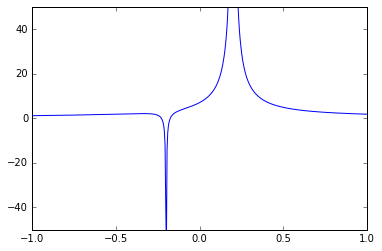

In [9]:
%matplotlib inline
from scipy import *
import matplotlib.pyplot as plt

## Return the potential at measurement points x produced by particles
## at positions xc and charges qc.  xc, qc, and x must be 1D arrays,
## with xc and qc of equal length.  The return value is an array
## of the same length as x, containing the potentials at each point.
def potential(xc, qc, x):
    M = len(x)
    N = len(xc)
    phi = zeros(M)
    for j in range(N):
        phi += qc[j] / abs(x - xc[j])
    return phi

particles_x = array([0.2, -0.2])
particles_q = array([1.5, -0.1])

x = linspace(-1, 1, 500)

phi = potential(particles_x, particles_q, x)

plt.plot(x, phi)
pmin, pmax = -50, 50
plt.ylim(pmin, pmax)
plt.show()

The resulting figure shows the electric potential produced by two particles, one at position $x_0 = 0.2$ with charge $q_0 = 1.5$ and the other at position $x_1 = -0.2$ with charge $q_1 = -0.1$.

Notice the presence of **indentation** in the code.  Indentation refers to spaces at the beginning of certain lines. As we'll see in a moment, indentation holds important meanings in Python programs.  If you're copying the above code into a Python file, be sure not to change the indentation.

The program consists of less than 20 lines of actual code, but there is a lot happening within these lines.  At the top of the program, we see the usual module import statements, whose meanings [we've already discussed](#import). Let's walk through the rest of the program, piece by piece.

### Comments<a name="comments"></a>

The next few lines in the program consist of **[code comments](http://en.wikipedia.org/wiki/Comment_%28computer_programming%29)**.  Python ignores the <code>#</code> character and everything that follows it, up to the end of the line.  Comments in source code are meant to explain to human readers what the program is supposed to be doing. Their presence is extremely important, even in simple programs like this.

When you write your own programs, please include comments. You don't need a comment for every line of code you write&mdash;that would be excessive. But at a minimum, each function should have a comment explaining what it does, and what the inputs and return values are. In this case, the comments are explaining the <code>potential</code> function.

### Function definition<a name="function"></a>

Below the comments, there are seven lines of code that comprise the **function definition** for the function named <code>potential</code>. This is the function that will be responisble for computing the electrostatic potential.  The function definition is reproduced here for easy reference:

    def potential(xc, qc, x):
        M = len(x)
        N = len(xc)
        phi = zeros(M)
        for j in range(N):
            phi += qc[j] / abs(x - xc[j])
        return phi

The first line, beginning with the <code>[def](https://docs.python.org/3/reference/compound_stmts.html#function-definitions)</code> keyword, is a **function header**. It states that the function is named <code>potential</code>, and that it has three inputs.  In computing terminology, the inputs that a function accepts are called **parameters**. In this case, the parameters are named <code>xc</code>, <code>qc</code> and <code>x</code>. As explained in the preceding [code comments](#comments), these parameters are meant to represent particle positions, the charges, and the positions at which to measure the potential, respectively.

<a name="indentation"></a>
Directly below the function header is the **function body**, which specifies what the function actually does.  The code in the function body is **indented**, meaning that there are empty spaces at the front of each line. Python uses indentation to identify which lines of code belong to the function body. For readability, indentation typically consists of multiples of 4 spaces, and each multiple of 4 spaces is called an **indentation level**.  The function body consists of consecutive lines of code with higher indentation levels than the function header.

The function definition ends when we get to a non-empty line of code at the same indentation level as the function header. That terminating line is considered a separate line of code, not part of the function definition.

The code in a function body is run each time the function is called. In this case, the function body consists of six lines, which are meant to compute $\phi(x)$ using the procedure outlined [previously](#potentialfunction):
* The first two lines define two helpful variables, <code>M</code> and <code>N</code>.  These are set to the lengths of the <code>x</code> and <code>xc</code> arrays, using Python's built-in <code>[len](https://docs.python.org/3/library/functions.html#len)</code> function.
* The next line calls the <code>[zeros](http://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html)</code> function. The input is <code>M</code>, the length of the <code>x</code> array (i.e., the number of points at which to calculate $\phi$).  The <code>[zeros](http://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html)</code> function returns an array of that length, with every element set to 0.0.  For now, this represents the electric potential in the absence of any charges.  We name this array <code>phi</code>.
* Next, we iterate over each of the particles and add up its contribution to the potential. This is done using a construct known as a <code>[for](http://docs.python.org/3/tutorial/controlflow.html#for-statements)</code> loop:
        for j in range(N):
            phi += qc[j] / abs(x - xc[j])
<p>The first line is the loop header; the following line, having one extra level of indentation (4 spaces), is the loop body. The header specifies how often to run the loop body, using the variable <code>j</code> to keep track. In this case, the header says to let <code>j</code> loop over the sequence given by <code>range(N)</code>. This uses a call to Python's built-in <code>[range](http://docs.python.org/3/tutorial/controlflow.html#the-range-function)</code> function; <code>N</code> is the number of electric charges, and the resulting sequence consists of <code>N</code> successive integers starting from 0.  (Note that the last value in the sequence is <code>N-1</code>, not <code>N</code>, because the sequence starts from 0.) In other words, we run the loop body once for each particle.
* Inside the loop, for each <code>j</code> we compute <code>qc[j] / abs(X - xc[j])</code>. This is an array whose elements are the values of the electric potential at the set of positions <code>X</code>, arising from the individual particle <math>j</math>.  In mathematical terms, we are calculating</p>$$\phi_j(X) \equiv \frac{q_j}{|X - x_j|}$$<p>using the array of positions <code>x</code>.  We then add this result to the <code>phi</code> array (by using the <code>+=</code> operator).  Once this is done for all <code>j</code>, the array <code>phi</code> will contain the desired total potential,</p>$$\phi(X) = \sum_{j=0}^{N-1}\phi_j(X).$$
* Finally, we call <code>return</code> to specify the function's  output, or **return value**.  This is the array <code>phi</code>.

### Top-level code: numerical constants

After the function definition comes the code to use the function:

    particles_x = array([0.2, -0.2])
    particles_q = array([1.5, -0.1])
    x = linspace(-1, 1, 500)

Like the [import statements at the beginning of the program](import), these lines of code lie at **top-level**, meaning that they have no [indentation](#indentation).  The [function header](#function) for the <code>potential</code> function is also a top-level line.

The above lines define variables to store some numerical constants.  In the first two lines, <code>particles_x</code> and <code>particles_q</code> variables store the numerical values of the positions and charges we are interested in.  These are initialized using the <code>[array](http://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html)</code> function.  (You may be wondering why the <code>array</code> function call has square brackets nested in commas. We'll explain this in [the second part of the tutorial](01_tutorial_contd.ipynb).) On the third line, the <code>[linspace](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)</code> function call returns an array, whose contents are initialized to the 500 numbers between -3 and 3 (inclusive).

Next, we call the <code>potential</code> function (which we've [already defined above](#function)):

    phi = potential(particles_x, particles_q, x)

This function call causes the <code>potential</code> function to run using <code>particles_x</code> as the first input (which was named <code>xc</code> in the [function definition](#function)), <code>particles_q</code> as the second input (named <code>qc</code> in the function definition), and <code>x</code> as the third input (named <code>x</code> in the function definition).  Note that when you call a function this way, the names of the inputs in the *function call* need not match the names in the *function definition*&mdash;the inputs are assigned in the order that you supply them. When the function runs, it will use the data stored in <code>particles_x</code> wherever the function definition calls for <code>xc</code>, and the data stored in <code>particles_q</code> wherever the function definition calls for <code>qc</code>.

The return value is an array containing the total potential, evaluated at each of the positions specified in <code>x</code>.  This return value is named <code>phi</code>.

<table width=75%>
<tr><td>**Exercise**</td></tr>
<tr><td>
In the [code cell](#example1), replace the definitions of <code>particles_x</code> and <code>particles_q</code> as follows:<br/><br/>&nbsp;&nbsp;&nbsp;&nbsp;<code>particles_x = array([0.2, -0.2, -0.5, 0.5])</code><br/>&nbsp;&nbsp;&nbsp;&nbsp;<code>particles_q = array([1.5, -0.1, -1.0, 0.5])</code><br/><br/>Then run the code cell again. The plot should now show the electric potential produced by four particles. Note that we didn't have to change anything else in the program to increase the number of particles from two to four; thanks to the way we've written the <code>potential</code> function.</td></tr></table>

### Plotting

The final lines of the program are responsible for producing the plot:

    plt.plot(XX, phi)
    pmin, pmax = -50, 50
    plt.ylim(pmin, pmax)
    plt.show()

We have already seen how the <code>[plot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)</code> and <code>[show](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.show)</code> functions work.

Prior to calling <code>show</code>, we have added two extra lines to make the potential curve more legible, by adjusting the bounds of the vertical axis.  The <code>[ylim](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.ylim)</code> function accepts two parameters, the lower and upper bounds of the vertical axis.  Here, we set the bounds to -50 and 50 respectively.  (There also exists an <code>[xlim](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.xlim)</code> function, which does the same for the horizontal axis.)

Notice that in the line <code>pmin, pmax = -50, 50</code>, we set two variables, <code>pmin</code> and <code>pmax</code>, on the same line.  This is a helpful bit of Python syntax ("syntactic sugar" in programming jargon), meant to make code easier to read.  It's equivalent to having two separate lines, like this:

    pmin = -50
    pmax = 50

We go into more detail about this construct in [the second part of the tutorial](01_tutorial_contd.ipynb).